# train_data 만들기

#### X_train
* diff_att_pdistance : team_one's attacker_payload_distance - team_two's attacker_payload_distance
* diff_def_pdistance : team_one's defender_payload_distance -  team_two's defender_payload_distance
* diff_att_time_b : team_one's attacker_time_banked - team_two's attacker_time_banked
* diff_def_time_b : team_one's defender_time_banked - team_two's defender_time_banked
* diff_att_control_p : team_one's attacker_control_perecent - team_two's attacker_control_perecent
* diff_def_control_p : team_one's defender_control_perecent - team_two's defender_control_perecent
#### y
* result : team one이 우승하면 1 team two가 우승하면 0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/year_team12_data.csv')

In [5]:
df.head()

,key,map_winner,attacker_payload_distance1,attacker_payload_distance2,defender_payload_distance1,defender_payload_distance2,attacker_time_banked1,attacker_time_banked2,defender_time_banked1,defender_time_banked2,attacker_control_perecent1,attacker_control_perecent2,defender_control_perecent1,defender_control_perecent2,team_one_name,team_two_name,year
0,"(10223, 1)",Los Angeles Valiant,75.649597,75.615051,0.0,75.615051,125.750572,0.000000,240.000000,0.000000,0.0,0.0,0.0,0.0,Los Angeles Valiant,San Francisco Shock,2018
1,"(10223, 2)",Los Angeles Valiant,0.000000,0.000000,0.0,0.000000,262.185089,250.492004,276.396057,500.984009,0.0,0.0,0.0,0.0,Los Angeles Valiant,San Francisco Shock,2018
2,"(10223, 3)",Los Angeles Valiant,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,299.0,0.0,0.0,165.0,Los Angeles Valiant,San Francisco Shock,2018
3,"(10223, 4)",Los Angeles Valiant,75.563667,75.549507,0.0,75.549507,165.840027,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,Los Angeles Valiant,San Francisco Shock,2018
4,"(10224, 1)",Los Angeles Gladiators,70.178932,70.161865,0.0,70.161865,186.312805,0.000000,240.000000,0.000000,0.0,0.0,0.0,0.0,Los Angeles Gladiators,Shanghai Dragons,2018


In [6]:
df.columns

Index(['key', 'map_winner', 'attacker_payload_distance1',
       'attacker_payload_distance2', 'defender_payload_distance1',
       'defender_payload_distance2', 'attacker_time_banked1',
       'attacker_time_banked2', 'defender_time_banked1',
       'defender_time_banked2', 'attacker_control_perecent1',
       'attacker_control_perecent2', 'defender_control_perecent1',
       'defender_control_perecent2', 'team_one_name', 'team_two_name', 'year'],
      dtype='object')

In [7]:
df.shape

(3632, 17)

# 탐색

In [9]:
df[df['year']==2018].shape

(1109, 17)

In [11]:
df[df['year']==2019].shape

(1370, 17)

In [14]:
df[df['year']==2020].shape[0] 

1153

# 데이터 만들기

In [6]:
df1 = pd.DataFrame(index=range(0,len(df)), columns=['diff_att_pdistance'])

In [7]:
df1['diff_att_pdistance'] = df['attacker_payload_distance1'] - df['attacker_payload_distance2']
df1['diff_def_pdistance'] = df['defender_payload_distance1'] - df['defender_payload_distance2']
df1['diff_att_time_b'] = df[ 'attacker_time_banked1'] - df['attacker_time_banked2'] 
df1['diff_def_time_b'] = df[ 'defender_time_banked1'] - df['defender_time_banked2'] 
df1['diff_att_control_p'] = df['defender_control_perecent1'] - df['attacker_control_perecent2']
df1['diff_def_control_p'] = df['defender_control_perecent1']-df['defender_control_perecent2']

* 시간별 정규화 안한거임. (어떤걸해야할지몰라서. 정규화하는 코드는 작성함, 변수만 선택하며됨)

In [8]:
df1.head()

,diff_att_pdistance,diff_def_pdistance,diff_att_time_b,diff_def_time_b,diff_att_control_p,diff_def_control_p
0,0.034546,-75.615051,125.750572,240.000000,0.0,0.0
1,0.000000,0.000000,11.693085,-224.587952,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.0,-165.0
3,0.014160,-75.549507,165.840027,0.000000,0.0,0.0
4,0.017067,-70.161865,186.312805,240.000000,0.0,0.0


# target y  만들기

* team one 승 1
* team one 패 0

In [9]:
target = []
for i in range(len(df)):
    if df.loc[i,'team_one_name'] == df.loc[i,'map_winner']:
        target.append(1)
    else:
        target.append(0)

In [10]:
df1['target'] = target

In [11]:
df1.head()

,diff_att_pdistance,diff_def_pdistance,diff_att_time_b,diff_def_time_b,diff_att_control_p,diff_def_control_p,target
0,0.034546,-75.615051,125.750572,240.000000,0.0,0.0,1
1,0.000000,0.000000,11.693085,-224.587952,0.0,0.0,1
2,0.000000,0.000000,0.000000,0.000000,0.0,-165.0,1
3,0.014160,-75.549507,165.840027,0.000000,0.0,0.0,1
4,0.017067,-70.161865,186.312805,240.000000,0.0,0.0,1


In [25]:
df1['target'].value_counts()

0    2000
1    1632
Name: target, dtype: int64

Text(0, 0.5, 'map game count')

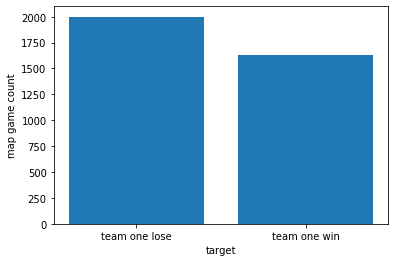

In [30]:
plt.bar(['team one lose','team one win'],df1['target'].value_counts())
plt.xlabel('target')
plt.ylabel('map game count')

In [14]:
#df1.to_csv('data/e-sprot_data.csv',index=False)

* 실시간 승률 예측